In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Data locations

In [7]:
loc_7_dwarfs = os.path.join('../data/7_dwarfs_train.csv')

## Read data

In [8]:
df_7_dwarfs_raw = pd.read_csv(loc_7_dwarfs)

## Oefening 1

In [32]:
def compute_Lp(values, p = 2):

    avg = np.mean(values)
    lp_norm = (1 / len(values) * np.sum( np.abs(values - avg) ** p ) ) ** (1 / p)
    return lp_norm

In [33]:
## Step 1: preprocess data
vals_7_dwarfs = df_7_dwarfs_raw['SPOSTMIN'].values
vals_7_dwarfs = vals_7_dwarfs[(~np.isnan(vals_7_dwarfs)) & (vals_7_dwarfs >= 0)]

In [44]:
lp_norms = list()
pvals = range(1, 101)
for p in pvals:
    lp_norms.append(compute_Lp(vals_7_dwarfs, p = p))

max_dev = np.max(np.abs(vals_7_dwarfs - np.mean(vals_7_dwarfs)))

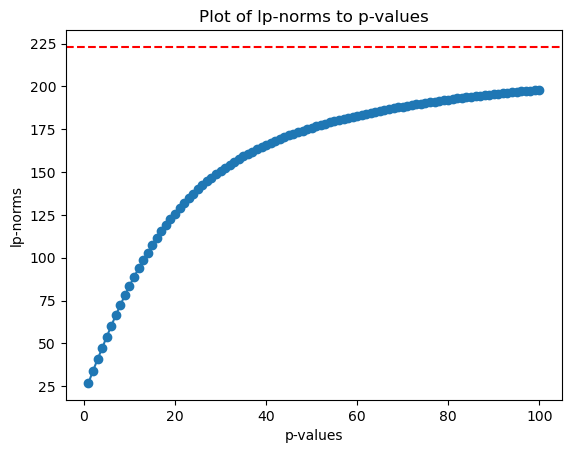

In [45]:
# Plot the lp_norms to pvals
plt.plot(pvals, lp_norms, 'o-')

# Plot a horizontal line at the value of max_dev
plt.axhline(y=max_dev, color='r', linestyle='--')

# Set the axis labels and title
plt.xlabel('p-values')
plt.ylabel('lp-norms')
plt.title('Plot of lp-norms to p-values')

# Display the plot
plt.show()

## Histogram

In [66]:
print(f"The MAD is equal to {compute_Lp(vals_7_dwarfs, p = 1)}, ")
print(f"The standard deviation is equal to {compute_Lp(vals_7_dwarfs, p = 2)}, ")

The MAD is equal to 26.890171250510612, 
The standard deviation is equal to 33.993305226124555, 


In [91]:
def plot_with_Lp_surround(values, p = 2):

    lp = compute_Lp(values, p = p)
    fig, ax = plt.subplots(figsize = (12, 4))

    ax.hist( vals_7_dwarfs, bins = 30);
    ax.axvline( x = np.mean(vals_7_dwarfs), color = 'r', lw = 3 )
    ax.axvline( x = np.mean(vals_7_dwarfs) + lp, color = 'g', lw = 3 )
    ax.axvline( x = np.mean(vals_7_dwarfs) - lp, color = 'g', lw = 3 )
    return fig, ax

(<Figure size 1200x400 with 1 Axes>, <AxesSubplot:>)

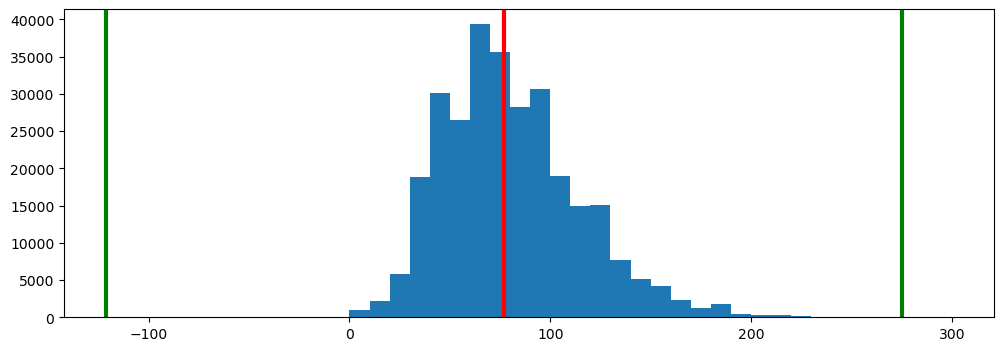

In [92]:
plot_with_Lp_surround(vals_7_dwarfs, p = 100)